# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aqu√≠](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. M√°s informaci√≥n sobre el dataset [aqu√≠](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploraci√≥n de datos y Procesamiento del Lenguaje Natural

Ded√≠cale un buen tiempo a hacer un An√°lisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, ser√° dif√≠cil completar este an√°lisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¬øqu√© palabras est√°n asociadas a calificaciones positivas y qu√© palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la cr√≠tica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¬øes un problema de Clasificaci√≥n o de Regresi√≥n?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Eval√∫a de forma apropiada sus resultados. Justifica la m√©trica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperpar√°metros de tu modelo.
1. Intenta responder la pregunta: ¬øQu√© informaci√≥n est√° usando el modelo para predecir?

**Recomendaci√≥n:** si no te resulta conveniente trabajar en espa√±ol con NLTK, te recomendamos que explores la librer√≠a [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¬øValdr√° la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar √∫nicamente las etiquetas Positiva y Negativa a cada cr√≠tica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qu√© situaci√≥n puede ser √∫til. ¬øEsperas que el desempe√±o sea mejor o peor?
1. ¬øHay algo que te gustar√≠a investigar o probar?

### **¬°T√≥mate tiempo para investigar y leer mucho!**

---------

# 1. An√°lisis Exploratorio de Datos

## 1.1 Librer√≠as y bases de datos

Importamos las librer√≠as requeridas para el desarrolllo del proyecto.

In [1]:
import pandas as pd
import numpy as np 
import prettytable as pt

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importamos la librer√≠a Natural Language Tokenizer
import nltk

#Diccionario de stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('spanish'))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

Importamos las bases de datos: *dev*, *test* y *train* de los reviews de productos de amazon.

In [3]:
dev = pd.read_json('dataset_es_dev.json', lines = True)
test = pd.read_json('dataset_es_test.json', lines = True)
train = pd.read_json('dataset_es_train.json', lines = True)
sets = [dev,test,train]

## 1.2 Exploraci√≥n general de los datos

Iniciamos revisando los features y tama√±o de los diferentes sets de datos.

In [4]:
cols = pt.PrettyTable()
cols.add_column('DEV', dev.columns.tolist())
cols.add_column('TEST', test.columns.tolist())
cols.add_column('TRAIN', train.columns.tolist())
print(cols)

+------------------+------------------+------------------+
|       DEV        |       TEST       |      TRAIN       |
+------------------+------------------+------------------+
|    review_id     |    review_id     |    review_id     |
|    product_id    |    product_id    |    product_id    |
|   reviewer_id    |   reviewer_id    |   reviewer_id    |
|      stars       |      stars       |      stars       |
|   review_body    |   review_body    |   review_body    |
|   review_title   |   review_title   |   review_title   |
|     language     |     language     |     language     |
| product_category | product_category | product_category |
+------------------+------------------+------------------+


In [5]:
sizes = pt.PrettyTable()
sizes.add_column('DEV', dev.shape)
sizes.add_column('TEST', test.shape)
sizes.add_column('TRAIN', train.shape)
print(sizes)

+------+------+--------+
| DEV  | TEST | TRAIN  |
+------+------+--------+
| 5000 | 5000 | 200000 |
|  8   |  8   |   8    |
+------+------+--------+


Como observaci√≥n inicial revisamos las primeras 5 instancias del dataset *dev* . Donde observamos los id del producto, reviewer y review, la cantidad de estrellas el t√≠tulo y descripci√≥n del review, el lenguaje y la categor√≠a del producto.

In [6]:
dev.head()

review_id          product_id          reviewer_id  stars  \
0  es_0417480  product_es_0873923  reviewer_es_0672978      1   
1  es_0180432  product_es_0713146  reviewer_es_0100858      1   
2  es_0144850  product_es_0356874  reviewer_es_0486447      1   
3  es_0339629  product_es_0939832  reviewer_es_0894703      1   
4  es_0858362  product_es_0489066  reviewer_es_0887663      1   

                                         review_body  \
0  Malisimo, muy grande demasiado aparatoso y mal...   
1          No he recibido el pedido no la devoluci√≥n   
2  Tengo que buscar otro sistema, este no funcion...   
3  Utilic√© las brocas de menor di√°metro y se me d...   
4         No me gusta su olor a viejo y aspecto malo   

                         review_title language  product_category  
0                         Mala compra       es          wireless  
1                   No lo he recibido       es           apparel  
2  Que no aprieta bien en el manillar       es            sports  
3               Brocas de mantequilla       es  home_improvement  
4                         No me gusta       es            beauty

El feature de lenguaje tiene un √∫nico valor de *es*, indicando el idioma espa√±ol. No se usar√°, as√≠ que se elimina.

In [4]:
print(dev['language'].value_counts(),'\n',train['language'].value_counts(),'\n',test['language'].value_counts())
dev.drop(['language'],axis=1,inplace=True)
train.drop(['language'],axis=1,inplace=True)
test.drop(['language'],axis=1,inplace=True)

es    5000
Name: language, dtype: int64 
 es    200000
Name: language, dtype: int64 
 es    5000
Name: language, dtype: int64


Con el objetivo de tener una idea general de los datasets, de los productos y de los promedios en cantidad de estrellas por set de datos para comparar con los resultados finales del modelo de predicci√≥n, se desarrollan las siguientes gr√°ficas:

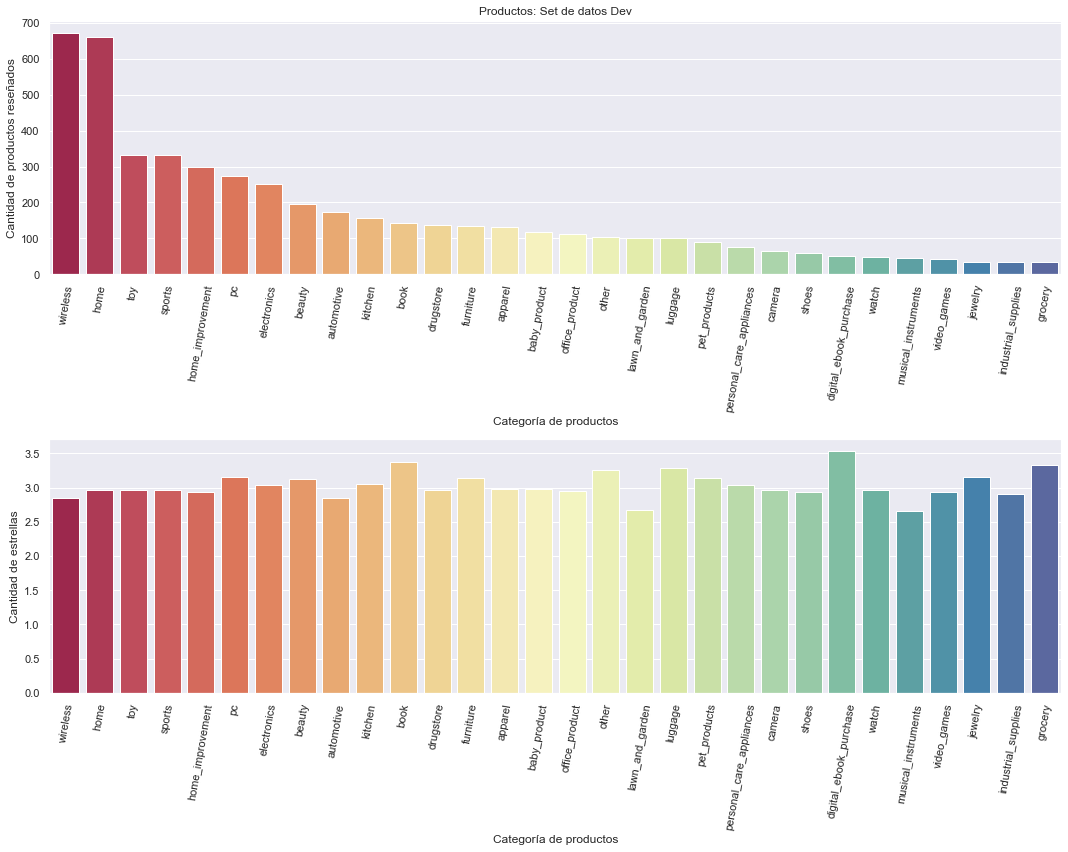

In [8]:
fig, axes = plt.subplots(2,1,figsize=(15, 12))
categoria_producto = dev['product_category'].value_counts();
promedio_estrellas = dev.groupby("product_category", as_index=False).mean()


sns.countplot(ax=axes[0], data=dev, x='product_category', palette="Spectral", order=categoria_producto.index)
axes[0].tick_params(axis='x', labelrotation= 80)
axes[0].set(xlabel='Categor√≠a de productos',ylabel='Cantidad de productos rese√±ados',title='Productos: Set de datos Dev')
sns.barplot(ax=axes[1], x = "product_category", y = "stars", data = promedio_estrellas, palette="Spectral", order=categoria_producto.index);
axes[1].tick_params(axis='x', labelrotation= 80)
axes[1].set(xlabel='Categor√≠a de productos',ylabel='Cantidad de estrellas')
plt.tight_layout();

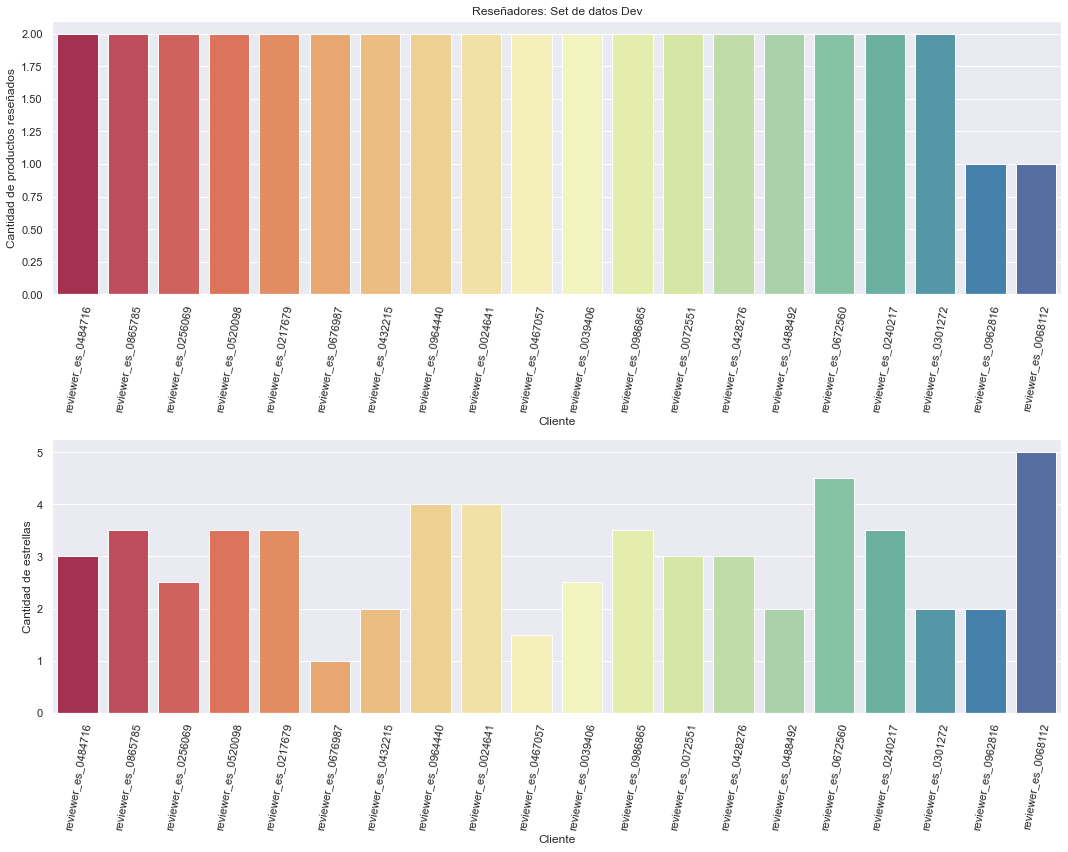

In [9]:
fig, axes = plt.subplots(2,1,figsize=(15, 12))
categoria_cliente = dev['reviewer_id'].value_counts()[:20];
promedio_estrellas = dev.loc[dev.reviewer_id.isin(categoria_cliente.index)].groupby("reviewer_id", as_index=False).mean()

sns.countplot(ax=axes[0], data=dev, x='reviewer_id', palette="Spectral", order=categoria_cliente.index)
axes[0].tick_params(axis='x', labelrotation= 80)
axes[0].set(xlabel='Cliente',ylabel='Cantidad de productos rese√±ados',title='Rese√±adores: Set de datos Dev')
sns.barplot(ax=axes[1], x = "reviewer_id", y = "stars", data = promedio_estrellas, palette="Spectral", order=categoria_cliente.index);
axes[1].tick_params(axis='x', labelrotation= 80)
axes[1].set(xlabel='Cliente',ylabel='Cantidad de estrellas')
plt.tight_layout();

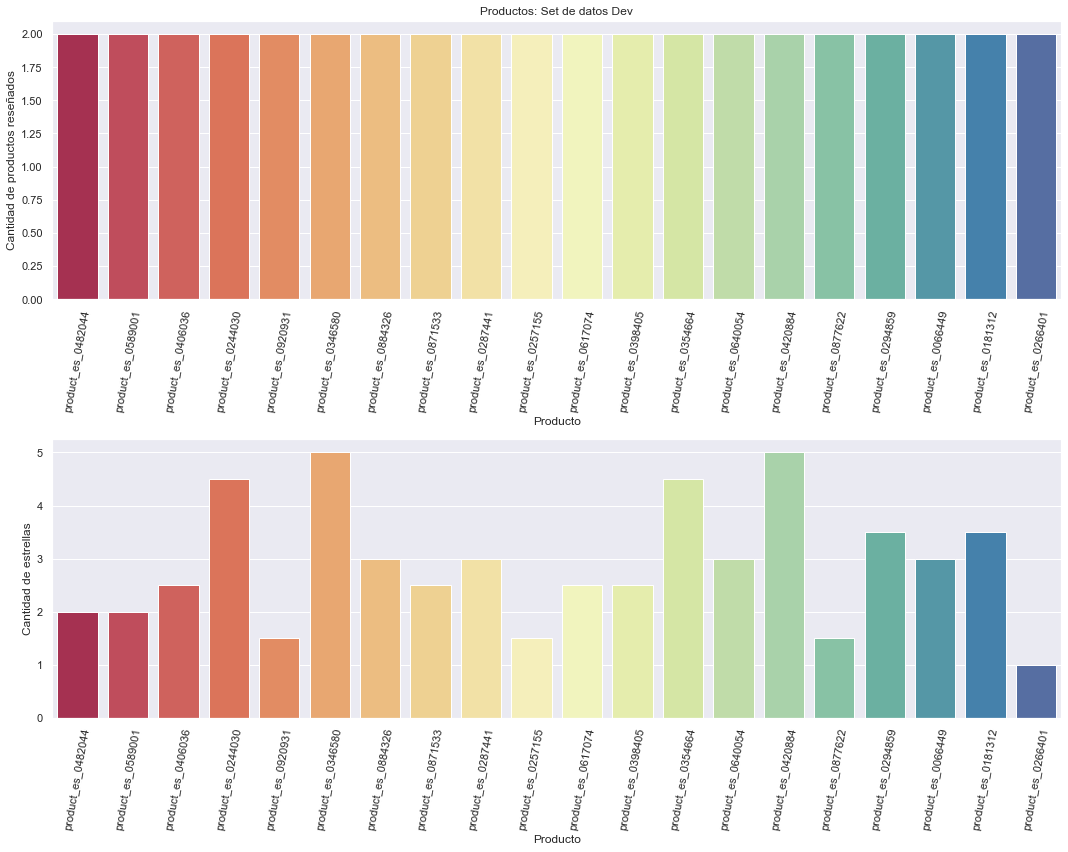

In [10]:
fig, axes = plt.subplots(2,1,figsize=(15, 12))
producto = dev['product_id'].value_counts()[:20];
promedio_estrellas = dev.loc[dev.product_id.isin(producto.index)].groupby("product_id", as_index=False).mean()

sns.countplot(ax=axes[0], data=dev, x='product_id', palette="Spectral", order=producto.index)
axes[0].tick_params(axis='x', labelrotation= 80)
axes[0].set(xlabel='Producto',ylabel='Cantidad de productos rese√±ados',title='Productos: Set de datos Dev')
sns.barplot(ax=axes[1], x = "product_id", y = "stars", data = promedio_estrellas, palette="Spectral", order=producto.index);
axes[1].tick_params(axis='x', labelrotation= 80)
axes[1].set(xlabel='Producto',ylabel='Cantidad de estrellas')
plt.tight_layout();

Como podemos ver, el tipo de producto no tiene un efecto muy fuerte en la puntuaci√≥n promedio de este, la categor√≠a mejor puntuada en promedio son los eBoooks, cuya calidad es est√°ndar y su puntuacion depende de cuanto le guste al comprador el contenido. Y el rese√±ador o el producto tampoco son muy relevantes, ya que ambos tienen frecuencia m√°xima de 2 instancias: no hay rese√±adores con alto volumen de rese√±as ni positivas ni negativas que podr√≠an afectar el modelo con maneras de escribir espec√≠ficas a una sola persona, ni productos con muchos reviews que podrian afectar el modelo con palabras espec√≠ficas a ese producto.

Verificamos la distribuci√≥n  de estrellas en los set de datos:

In [11]:
dis_stars = pt.PrettyTable()
dis_stars.add_column('Estrellas', [1,2,3,4,5])
dis_stars.add_column('set Dev', dev.stars.value_counts().tolist())
dis_stars.add_column('set Train', train.stars.value_counts().tolist())
dis_stars.add_column('set Test', test.stars.value_counts().tolist())
print(dis_stars)

+-----------+---------+-----------+----------+
| Estrellas | set Dev | set Train | set Test |
+-----------+---------+-----------+----------+
|     1     |   1000  |   40000   |   1000   |
|     2     |   1000  |   40000   |   1000   |
|     3     |   1000  |   40000   |   1000   |
|     4     |   1000  |   40000   |   1000   |
|     5     |   1000  |   40000   |   1000   |
+-----------+---------+-----------+----------+


Las etiquetas est√°n perfectamente distribuidas, indicando que las entradas del modelo van a estar balanceadas.

Finalmente, revisamos la cantidad de palabras que tienen los reviews:

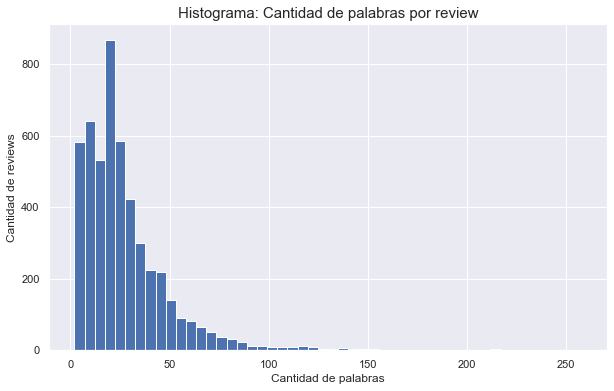

In [12]:
fig = plt.figure(figsize = (10,6))
ax = plt.axes()
words_per_review = dev.review_body.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 50)
ax.set(xlabel='Cantidad de palabras',ylabel='Cantidad de reviews')
plt.title('Histograma: Cantidad de palabras por review', fontsize=15);

In [13]:
print('La cantidad promedio de palabras por review es de:',words_per_review.mean())

La cantidad promedio de palabras por review es de: 27.572


# 2. Procesamiento de Lenguaje Natural

## 2.1. Pre-procesamiento de los datos

Con el fin de normalizar todos los datos para su evaluaci√≥n se aplica la funci√≥n *.lower* para que todos los car√°cteres est√©n en min√∫scula y evitar errores en los siguientes pasos.

In [5]:
for set in sets:
    set.review_body = set.review_body.apply(lambda x: x.lower())
    set.review_title = set.review_title.apply(lambda x: x.lower())

In [6]:
test.head()

review_id          product_id          reviewer_id  stars  \
0  es_0038754  product_es_0113523  reviewer_es_0580071      1   
1  es_0748979  product_es_0017036  reviewer_es_0819733      1   
2  es_0411746  product_es_0138642  reviewer_es_0508607      1   
3  es_0786686  product_es_0170887  reviewer_es_0491157      1   
4  es_0429700  product_es_0710642  reviewer_es_0008745      1   

                                         review_body  \
0  no me llego el articulo me lo mando por correo...   
1              la mensajer√≠a horrible, no compro mas   
2  estoy muy decepcionado con el vendedor ya que ...   
3  mi valoraci√≥n no es sobre el producto sino sob...   
4  pues ten√≠a inter√©s en este libro y prob√© la ve...   

                                review_title        product_category  
0                                no me llego                wireless  
1   amazon sigue sin cumplir en las entregas                    home  
2                         estafa en el env√≠o                     toy  
3                           estafa de amazon                    home  
4  no consegu√≠ pasar de la portada en kindle  digital_ebook_purchase

Clasificamos los reviews como positivos para los que tienen 4 o 5 estrellas y negativos para los que tienen 3, 2 o 1 estrella.

In [7]:
for set in sets:
    set['binario'] = np.where(set.stars > 3, 1, 0)
    print(set['binario'].value_counts())

0    3000
1    2000
Name: binario, dtype: int64
0    3000
1    2000
Name: binario, dtype: int64
0    120000
1     80000
Name: binario, dtype: int64


## 2.2 Tokenizaci√≥n

Transformamos los reviews mediante un tokenizado para evaluar los comentarios por palabra. Adicionalmente eliminamos caracteres especiales,signos de puntuaci√≥n, palabras mal escritas, n√∫meros y emojis.

In [25]:
characters_list = dev.review_body.apply(lambda x: [each for each in x if not each.isalpha() and each != ' '])
df_caracteres = []
for i in range(len(characters_list)):
	df_caracteres.append(characters_list[i])
df_caracteres = [item for elem in df_caracteres for item in elem]

In [27]:
np.unique(df_caracteres)

array(['!', '"', '#', '%', "'", '(', ')', '*', '+', ',', '-', '.', '/',
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<',
       '=', '>', '?', '_', '~', '¬°', '¬∞', '¬ø', '‚Äù', '‚Ä¶', '‚Ç¨', '‚ù§', 'Ô∏è',
       'üòÇ', 'üòä', 'üòå', 'üòí', 'üòî', 'üò°', 'üò£', 'üò§', 'üò¨', 'üò≥', 'üôà', 'ü§î', 'ü§£'],
      dtype='<U1')

In [30]:
for character in df_caracteres:
	dev.review_body = dev.review_body.apply(lambda x: x.replace(character, ' '))

In [32]:
for character in df_caracteres:
	dev.review_title = dev.review_title.apply(lambda x: x.replace(character, ' '))

In [37]:
def tokenizar(df):

	new_df = df[['review_id','stars','binario','review_body','review_title']]

	new_df['body_token'] = new_df.review_body.apply(lambda x: nltk.tokenize.word_tokenize(x))
	new_df['title_token'] = new_df.review_title.apply(lambda x: nltk.tokenize.word_tokenize(x))

	# #characters_list = new_df.body_token.apply(lambda x: [each for each in list(x) if not each.isalpha() and each != ' '])

	# #characters_list = characters_list.append(new_df.review_title.apply(lambda x: [each for each in list(x) if not str(each).isalpha() and each != ' ']))
	# #characters = [item for sublist in characters_list for item in sublist]
	# print('Cantidad de caracteres eliminados: ', len(characters))
	# print('Caracteres especiales eliminados: ',np.unique(characters))
	# characters_unicos = np.unique(characters).tolist()

	#Se deja la palabra no, para pruebas
	#stopwords.remove('no')
	#stopwords.remove('pero')
	for column in ['body_token', 'title_token']:
		for i in range(len(new_df.body_token)):
			#new_df[column][i] = [word for word in new_df[column][i] if word not in characters]
			new_df[column][i] = [word for word in new_df[column][i] if word not in stopwords]

	return new_df

In [38]:
dev_token = tokenizar(dev)

Como resultado observamos que las columnas tokenizadas estan conformadas por listas de las palabras representativas de los comentarios, en min√∫sculas y sin signos de puntuaci√≥n:

In [39]:
dev_token.head()

review_id  stars  binario  \
0  es_0417480      1        0   
1  es_0180432      1        0   
2  es_0144850      1        0   
3  es_0339629      1        0   
4  es_0858362      1        0   

                                         review_body  \
0  malisimo  muy grande demasiado aparatoso y mal...   
1          no he recibido el pedido no la devoluci√≥n   
2  tengo que buscar otro sistema  este no funcion...   
3  utilic√© las brocas de menor di√°metro y se me d...   
4         no me gusta su olor a viejo y aspecto malo   

                         review_title  \
0                         mala compra   
1                   no lo he recibido   
2  que no aprieta bien en el manillar   
3               brocas de mantequilla   
4                         no me gusta   

                                          body_token  \
0  [malisimo, grande, demasiado, aparatoso, mal, ...   
1             [no, recibido, pedido, no, devoluci√≥n]   
2  [buscar, sistema, no, funciona, bien, abrazade...   
3  [utilic√©, brocas, menor, di√°metro, doblaron, v...   
4            [no, gusta, olor, viejo, aspecto, malo]   

                     title_token  
0                 [mala, compra]  
1                 [no, recibido]  
2  [no, aprieta, bien, manillar]  
3          [brocas, mantequilla]  
4                    [no, gusta]

## 2.3 Lemmatizaci√≥n

Evaluamos la librer√≠a Spacy para realizar la lemmatizaci√≥n:

In [40]:
import spacy
#spacy.prefer_gpu()
nlp = spacy.load("es_core_news_sm")

In [44]:
Lemma_prueba = pd.DataFrame(columns = ['Token','Token Text','Token Pos', 'Token Lemma'])
dev_token['body_lemma'] = dev_token.body_token.apply(lambda x: ' '.join(x))
doc = nlp(dev_token['body_lemma'][2])
for token in doc:
    Lemma_prueba = Lemma_prueba.append({'Token':token, 'Token Text':token.text, 'Token Pos':token.pos_,
    'Token Lemma':token.lemma_}, ignore_index=True)
print(Lemma_prueba)

         Token  Token Text Token Pos Token Lemma
0       buscar      buscar      VERB      buscar
1      sistema     sistema      NOUN     sistema
2           no          no       ADV          no
3     funciona    funciona      VERB   funcionar
4         bien        bien       ADV        bien
5   abrazadera  abrazadera      NOUN  abrazadera
6        lleva       lleva      VERB      llevar
7      agarrar     agarrar      VERB     agarrar
8     manillar    manillar      VERB    manillar
9           no          no       ADV          no
10     aprieta     aprieta      VERB     apretar
11        bien        bien       ADV        bien
12  deslizando  deslizando      VERB    deslizar
13    linterna    linterna      VERB    linterna
14       hacia       hacia       ADP       hacia
15       abajo       abajo       ADV      abajar


In [45]:
dev_token['body_lemma'] = dev_token.body_lemma.apply(lambda y: [token.lemma_ for token in nlp(y)])
dev_token['title_lemma'] = dev_token.title_token.apply(lambda x: ' '.join(x))
dev_token['title_lemma'] = dev_token.title_lemma.apply(lambda y: [token.lemma_ for token in nlp(y)])

In [46]:
dev_token.head()

review_id  stars  binario  \
0  es_0417480      1        0   
1  es_0180432      1        0   
2  es_0144850      1        0   
3  es_0339629      1        0   
4  es_0858362      1        0   

                                         review_body  \
0  malisimo  muy grande demasiado aparatoso y mal...   
1          no he recibido el pedido no la devoluci√≥n   
2  tengo que buscar otro sistema  este no funcion...   
3  utilic√© las brocas de menor di√°metro y se me d...   
4         no me gusta su olor a viejo y aspecto malo   

                         review_title  \
0                         mala compra   
1                   no lo he recibido   
2  que no aprieta bien en el manillar   
3               brocas de mantequilla   
4                         no me gusta   

                                          body_token  \
0  [malisimo, grande, demasiado, aparatoso, mal, ...   
1             [no, recibido, pedido, no, devoluci√≥n]   
2  [buscar, sistema, no, funciona, bien, abrazade...   
3  [utilic√©, brocas, menor, di√°metro, doblaron, v...   
4            [no, gusta, olor, viejo, aspecto, malo]   

                     title_token  \
0                 [mala, compra]   
1                 [no, recibido]   
2  [no, aprieta, bien, manillar]   
3          [brocas, mantequilla]   
4                    [no, gusta]   

                                          body_lemma  \
0  [malisimo, grande, demasiar, aparatoso, mal, p...   
1               [no, recibir, pedir, no, devoluci√≥n]   
2  [buscar, sistema, no, funcionar, bien, abrazad...   
3  [utilizar, broca, menor, di√°metro, doblar, var...   
4           [no, gustar, olor, viejo, aspecto, malo]   

                     title_lemma  
0                [malo, comprar]  
1                  [no, recibir]  
2  [no, apretar, bien, manillar]  
3           [broca, mantequilla]  
4                   [no, gustar]

## 2.4 An√°lisis de Frecuencia de las palabras

De acuerdo con el procesamiento anterior obtenemos una primera versi√≥n de la frecuencia de palabras que en general determinan si un comentario es positivo o negativo respecto a la clasficaci√≥n propuesta. Para analizar desarrollamos las gr√°ficas de frecuencia:

In [51]:
#Funci√≥n de frecuencias de las palabras
def get_freqs(df,columna,titulo):

	# Guardamos todos los titulos y rese√±as buenos y malos en listas separadas
	df_malos = df.loc[df.stars.isin([1,2,3])]
	df_buenos = df.loc[df.stars.isin([4,5])]
	df_malos.reset_index(inplace= True)
	df_buenos.reset_index(inplace= True)

	# Guardamos todos los titulos y rese√±as buenos y malos en listas separadas
	df_malos_lista = []
	for i in range(len(df_malos.review_title)):
		df_malos_lista.append(df_malos[columna][i])
	df_malos_lista = [item for elem in df_malos_lista for item in elem]

	df_buenos_lista = []
	for i in range(len(df_buenos.review_title)):
		df_buenos_lista.append(df_buenos[columna][i])
	df_buenos_lista = [item for elem in df_buenos_lista for item in elem]

	# Hacemos 4 dataframes con las frecuencias de las palabras
	df_malos_lista_freq = pd.DataFrame.from_dict(nltk.FreqDist(df_malos_lista), orient = 'index')
	df_malos_lista_freq['word'] = df_malos_lista_freq.index
	df_malos_lista_freq.sort_values(by = 0, ascending= False, inplace = True)

	df_buenos_lista_freq = pd.DataFrame.from_dict(nltk.FreqDist(df_buenos_lista), orient = 'index')
	df_buenos_lista_freq['word'] = df_buenos_lista_freq.index
	df_buenos_lista_freq.sort_values(by = 0, ascending= False, inplace = True)

	#Gr√°fica
	plt.figure(figsize= (8,4))
	plt.subplot(121)
	sns.barplot(x = df_malos_lista_freq[0][:10], y = df_malos_lista_freq.word[:10])
	plt.title(titulo + ': negativo')
	plt.xlabel('Cantidad')
	plt.subplot(122)
	sns.barplot(x = df_buenos_lista_freq[0][:10], y = df_buenos_lista_freq.word[:10])
	plt.title(titulo + ': positivo')
	plt.xlabel('Cantidad')
	plt.tight_layout();
	plt.show()

	return 

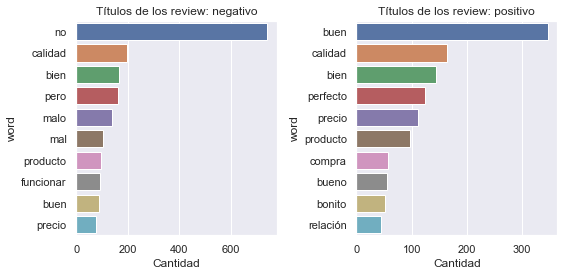

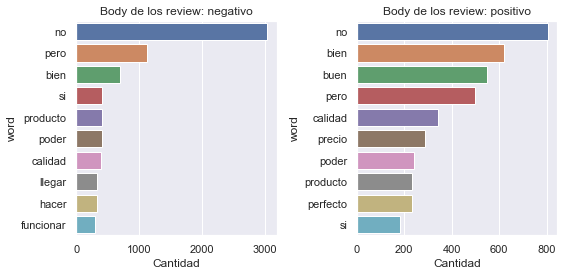

In [25]:
get_freqs(dev_token,'title_lemma','T√≠tulos de los review')
get_freqs(dev_token,'body_lemma','Body de los review')

Las gr√°ficas demuestran que hay muchas palabras que son muy comunes en todos los reviews y que se repiten tanto en los comentarios positivos como en los negativos como por ejemplo *calidad*, *producto* y *bien*. Por tanto, se decide eliminar algunas de las palabras m√°s repetidas en todos los comentarios para evaluar unicamente las palabras representativas que permitan realizar la clasificaci√≥n.

In [47]:
all_lemmas = []
for i in range(len(dev_token.body_lemma)):
	all_lemmas.append(dev_token.body_lemma[i])
all_lemmas = [item for elem in all_lemmas for item in elem]

one_percentile = int(len(np.unique(all_lemmas)) * 0.01)

#1% de las palabras m√°s comunes del dataset
from collections import Counter
count_freq = Counter(all_lemmas).most_common(one_percentile)
count_notfreq = Counter(all_lemmas).most_common()[-one_percentile:]

Del vector de palabras frecuentes se eliminan algunas que despu√©s de algunas pruebas se consideran fundamentales en le predicci√≥n.

In [48]:
a_remover = [word for word,val in count_freq] + [word for word,val in count_notfreq]
no_remover = ['bien', 'bueno','perfecto','malo','problema','tiempo','mal','encantar','perfectamente','no','mejor']
for i in no_remover:
    if i in a_remover:
        a_remover.remove(i)

In [49]:
#C√≥digo para remover las palabras
dev_token['title_lemma_rm'] = dev_token.title_lemma.apply(lambda x: [word for word in x if word not in a_remover])
dev_token['body_lemma_rm'] = dev_token.body_lemma.apply(lambda x: [word for word in x if word not in a_remover])

De forma que las nuevas gr√°ficas resultante son las siguientes:

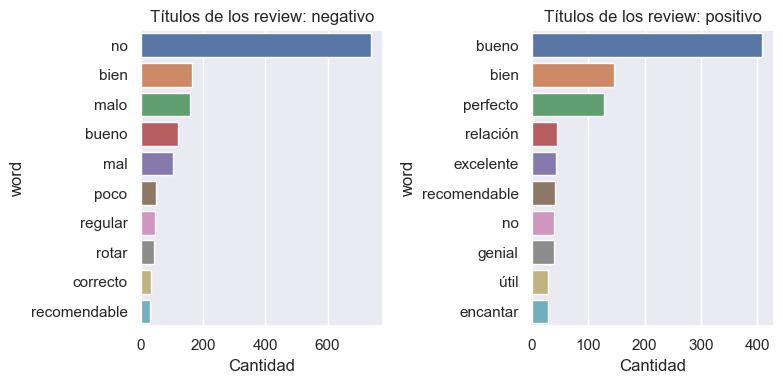

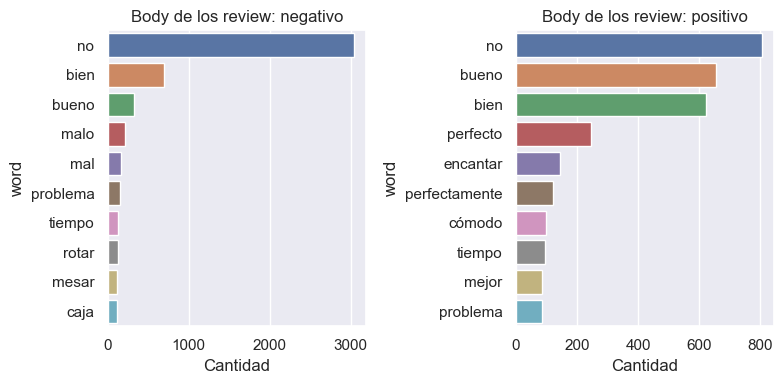

In [52]:
get_freqs(dev_token,'title_lemma_rm','T√≠tulos de los review')
get_freqs(dev_token,'body_lemma_rm','Body de los review')

Verificamos que se eliminan las palabras m√°s comunes que no aportaban informaci√≥n valiosa a la clasificaci√≥n y nos quedamos con palabras m√°s significativas como: *recomendable* o *√∫til* para comentarios positivos, y *defectuoso* o *devolver* para comentarios negativos. 

Sumaremos las palabras del titulo a las del cuerpo para tenerlas todas en un mismo feature. 

In [50]:
dev_token['words'] = dev_token['title_lemma'] + dev_token['body_lemma']
dev_token['words_rm'] = dev_token['title_lemma_rm'] + dev_token['body_lemma_rm']
dev_token.head()

review_id  stars  binario  \
0  es_0417480      1        0   
1  es_0180432      1        0   
2  es_0144850      1        0   
3  es_0339629      1        0   
4  es_0858362      1        0   

                                         review_body  \
0  malisimo  muy grande demasiado aparatoso y mal...   
1          no he recibido el pedido no la devoluci√≥n   
2  tengo que buscar otro sistema  este no funcion...   
3  utilic√© las brocas de menor di√°metro y se me d...   
4         no me gusta su olor a viejo y aspecto malo   

                         review_title  \
0                         mala compra   
1                   no lo he recibido   
2  que no aprieta bien en el manillar   
3               brocas de mantequilla   
4                         no me gusta   

                                          body_token  \
0  [malisimo, grande, demasiado, aparatoso, mal, ...   
1             [no, recibido, pedido, no, devoluci√≥n]   
2  [buscar, sistema, no, funciona, bien, abrazade...   
3  [utilic√©, brocas, menor, di√°metro, doblaron, v...   
4            [no, gusta, olor, viejo, aspecto, malo]   

                     title_token  \
0                 [mala, compra]   
1                 [no, recibido]   
2  [no, aprieta, bien, manillar]   
3          [brocas, mantequilla]   
4                    [no, gusta]   

                                          body_lemma  \
0  [malisimo, grande, demasiar, aparatoso, mal, p...   
1               [no, recibir, pedir, no, devoluci√≥n]   
2  [buscar, sistema, no, funcionar, bien, abrazad...   
3  [utilizar, broca, menor, di√°metro, doblar, var...   
4           [no, gustar, olor, viejo, aspecto, malo]   

                     title_lemma                 title_lemma_rm  \
0                [malo, comprar]                         [malo]   
1                  [no, recibir]                  [no, recibir]   
2  [no, apretar, bien, manillar]  [no, apretar, bien, manillar]   
3           [broca, mantequilla]           [broca, mantequilla]   
4                   [no, gustar]                           [no]   

                                       body_lemma_rm  \
0              [malisimo, aparatoso, mal, protector]   
1                      [no, recibir, no, devoluci√≥n]   
2  [buscar, sistema, no, bien, abrazadera, agarra...   
3  [utilizar, broca, menor, di√°metro, doblar, var...   
4                   [no, olor, viejo, aspecto, malo]   

                                               words  \
0  [malo, comprar, malisimo, grande, demasiar, ap...   
1  [no, recibir, no, recibir, pedir, no, devoluci√≥n]   
2  [no, apretar, bien, manillar, buscar, sistema,...   
3  [broca, mantequilla, utilizar, broca, menor, d...   
4  [no, gustar, no, gustar, olor, viejo, aspecto,...   

                                            words_rm  
0        [malo, malisimo, aparatoso, mal, protector]  
1         [no, recibir, no, recibir, no, devoluci√≥n]  
2  [no, apretar, bien, manillar, buscar, sistema,...  
3  [broca, mantequilla, utilizar, broca, menor, d...  
4               [no, no, olor, viejo, aspecto, malo]

Con el dataset tokenizado, utilizaremos el t√≠tulo y cuerpo de los reviews para realizar modelos que los clasifiquen inicialmente de manera binaria, de forma que sea m√°s sencillo identificar errores y mejoras en la secci√≥n de pre-procesamiento y obtener el mejor modelo posible por clasificaci√≥n binaria como benchmark. Posteriormente continuaremos con los modelos de clasificaci√≥n para las 5 estrellas. 

Para lo anterior definimos las palabras como vectores usando la estrategia Bag of Words que guarda para cada entrada un vector donde todas las palabras del corpus son una variable y el numero que la funcion le asigna es las veces que aparece en la rese√±a particular.

Transformamos el dataset asi:

In [ ]:
#dev_token = pd.read_csv('dataset_dev_token.csv')
data = dev_token[['words','words_rm','stars','binario']]
data['words_joint'] = data.words.apply(lambda x: ' '.join(x))
data['words_joint_rm'] = data.words_rm.apply(lambda x: ' '.join(x))

In [51]:
data.head()

words  \
0  [malo, comprar, malisimo, grande, demasiar, ap...   
1  [no, recibir, no, recibir, pedir, no, devoluci√≥n]   
2  [no, apretar, bien, manillar, buscar, sistema,...   
3  [broca, mantequilla, utilizar, broca, menor, d...   
4  [no, gustar, no, gustar, olor, viejo, aspecto,...   

                                            words_rm  stars  binario  \
0        [malo, malisimo, aparatoso, mal, protector]      1        0   
1         [no, recibir, no, recibir, no, devoluci√≥n]      1        0   
2  [no, apretar, bien, manillar, buscar, sistema,...      1        0   
3  [broca, mantequilla, utilizar, broca, menor, d...      1        0   
4               [no, no, olor, viejo, aspecto, malo]      1        0   

                                         words_joint  \
0  malo comprar malisimo grande demasiar aparatos...   
1          no recibir no recibir pedir no devoluci√≥n   
2  no apretar bien manillar buscar sistema no fun...   
3  broca mantequilla utilizar broca menor di√°metr...   
4        no gustar no gustar olor viejo aspecto malo   

                                      words_joint_rm  
0              malo malisimo aparatoso mal protector  
1                no recibir no recibir no devoluci√≥n  
2  no apretar bien manillar buscar sistema no bie...  
3  broca mantequilla utilizar broca menor di√°metr...  
4                      no no olor viejo aspecto malo

## 3. M√©tricas de Evaluaci√≥n

Definimos las m√©tricas de *accuracy, f1_score y matriz de confusi√≥n* para evaluar los modelos.

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV

In [171]:
def error(nombre, modelo, X_train, y_train, X_test, y_test, y_pred):
    
    # Data Frame para guardar los resultados
    errores = pd.DataFrame(columns = ['Modelo','Accuracy','f1_score', 'VP', 'VN','FP', 'FN'])

    accuracy = accuracy_score(y_test, y_pred)
    f1_sco = f1_score(y_test, y_pred, average='binary')

    names= ["Positivo", "Negativo"]
    cm=confusion_matrix(y_test,y_pred)
    f,ax=plt.subplots(figsize=(4,4))
    sns.heatmap(cm,annot=True, fmt=".0f",ax=ax, cmap='Blues')
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    vn, fp, fn, vp = confusion_matrix(y_test, y_pred).ravel()
    errores = errores.append({'Modelo':nombre,'Accuracy':accuracy,'f1_score':f1_sco, 'VP':vp, 'VN':vn,'FP':fp, 'FN':fn},  ignore_index=True)

    return errores

In [164]:
def errores_reviews(y_test, y_pred, dev_token, columna):
    errores_pos = []
    errores_neg = []
    errores_total = []
    for i in range(1500):
        #print(y_test.iloc[i], y_pred[i])
        if y_test.iloc[i] != y_pred[i]:
            if y_test.iloc[i] == 0:
                errores_neg.append(y_test.index[i])
                errores_total.append(y_test.index[i])
            else:
                errores_pos.append(y_test.index[i])
                errores_total.append(y_test.index[i])
    datos_pos = dev_token.loc[dev_token.index.isin(errores_pos),['review_title','review_body',columna]]
    datos_neg = dev_token.loc[dev_token.index.isin(errores_neg),['review_title','review_body',columna]] 
    print('Errores por cantidad de estrellas:')
    print(dev_token.loc[errores_total].groupby('stars').words.count())
    return datos_pos, datos_neg

In [170]:
def error5(nombre, modelo, X_train, y_train, X_test, y_test, y_pred, dev_token):
    
    # Data Frame para guardar los resultados
    errores5 = pd.DataFrame(columns = ['Modelo','Accuracy','f1_score'])

    accuracy = modelo.score(X_test,y_test)
    f1_sco = f1_score(y_test, y_pred, average=None)

    #names= y_train.unique().tolist()
    cm=confusion_matrix(y_test,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax, cmap='Blues')
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    #ax.set_xticklabels(names)
    #ax.set_yticklabels(names)
    plt.show()

    errores_total = []
    for i in range(1500):
        #print(y_test.iloc[i], y_pred[i])
        if y_test.iloc[i] != y_pred[i]:
            errores_total.append(y_test.index[i])

    print('Errores por cantidad de estrellas:')
    print(dev_token.loc[errores_total].groupby('stars').words.count())

    errores5 = errores5.append({'Modelo':nombre,'Accuracy':accuracy,'f1_score':f1_sco},  ignore_index=True)

    return errores5

## 4. Modelos de Machine Learning Binarios 

Ahora, a partir de los resultados procesados y organizados, procedemos a aplicar los modelos de Machine Learning para obtener la clasificaci√≥n y n√∫mero de estrellas por comentario.

Iniciaremos estableciendo como Benchmark el modelo que mejor clasifique los reviews de manera binaria: buenos o malos. Para esto evaluaremos un random forest y una regresi√≥n log√≠stica, utilizando el dataset tokenizado y la columna binario previamente establecida en la que 4 y 5 estrellas hacen un buen review y 1, 2 o 3 hacen uno malo. 

## 4.1 Dataset tokenizado

In [172]:
vectorizador=CountVectorizer(lowercase = False)

# Para los datos sin remover palabras
data_vec = vectorizador.fit_transform(data.words_joint)
X_data = data_vec.toarray()

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X_data, data['binario'], test_size = 0.3, random_state=42)

## 4.1.1 Random Forest Classifier

RandomForestClassifier(max_depth=30, n_estimators=150, random_state=42)


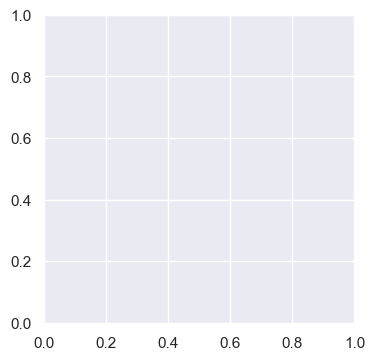

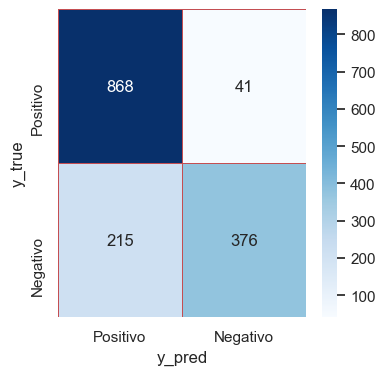

Modelo  Accuracy  f1_score   VP   VN  FP   FN
0  Random Forest Tokenizado  0.829333  0.746032  376  868  41  215

In [174]:
from sklearn.ensemble import RandomForestClassifier

#params = {'n_estimators': [50,,100,150], 'max_depth': [10,,15,30]}
params = {'n_estimators': [150],'max_depth': [30]}
rf = RandomForestClassifier(random_state=42)
rfo = GridSearchCV(rf, params)
rfo.fit(X_train,y_train)
print(rfo.best_estimator_)
best_rf = rfo.best_estimator_
y_pred = rfo.predict(X_test)

errores = error('Random Forest Tokenizado', best_rf, X_train, y_train, X_test, y_test, y_pred)
errores

**Evaluaci√≥n de los reviews mal predichos:**

In [175]:
datos_pos, datos_neg = errores_reviews(y_test, y_pred, dev_token, 'words_rm')

Errores por cantidad de estrellas:
stars
1      1
2      5
3     35
4    130
5     85
Name: words, dtype: int64


In [176]:
print('Reviews positivos calificados como negativos:')
datos_pos.head()

Reviews positivos calificados como negativos:


review_title  \
3006                                  bastante completo   
3007                          cobran mucho por el envio   
3017                                        su ligereza   
3024                   ocupa poco y la ranura es amplia   
3027  el frigor√≠fico es perfecto   el color silver n...   

                                            review_body  \
3006            no me gusta las instrucciones en ingles   
3007  llego bien pero el √∫ltimo d√≠a tardo casi una s...   
3017  que es muy ligero  aunque un poco bajo  y el p...   
3024  la tengo hace menos de un mes y me gusta  pero...   
3027  el frigor√≠fico es perfecto   el color silver n...   

                                               words_rm  
3006                [completar, no, instrucci√≥n, ingle]  
3007  [cobrar, envio, bien, √∫ltimo, tardar, casi, se...  
3017  [ligereza, ligero, bajar, plegar, complicar, n...  
3024  [ocupar, ranurar, amplio, mes, creer, caro, re...  
3027  [frigor√≠fico, perfecto, color, silver, no, rea...

In [177]:
print('Reviews negativos calificados como positivos:')
datos_neg.head()

Reviews negativos calificados como positivos:


review_title  \
259                                      entrega tarde   
1420                                              bien   
1557                                   antonio aguilar   
1598  calidad precio perfecto  pero ha llegado da√±ado    
1610               el segundo que compro y desilusi√≥n    

                                            review_body  \
259   producto perfecto  entrega con seur  nefasta  ...   
1420  es muy mono relaci√≥n calidad precio buena aunq...   
1557  el paquete es el que ped√≠  est√° en perfecto es...   
1598  el √°lbum genial en relaci√≥n calidad precio  pe...   
1610  hace m√°s de un a√±o compr√© uno y estaba encanta...   

                                               words_rm  
259   [entregar, tardar, perfecto, entregar, seur, n...  
1420     [bien, mono, relaci√≥n, bueno, no, maravilloso]  
1557  [antonio, aguilar, paquete, perfecto, fecho, e...  
1598  [perfecto, da√±ar, √°lbum, genial, relaci√≥n, fav...  
1610  [segundar, desilusi√≥n, a√±o, encantar, problema...

A partir de este primer modelo y la revisi√≥n de los errores, identificamos las palabras a eliminar y mantener de la secci√≥n 2.4. Por ejemplo, obtuvimos mejores resultados manteniendo la palabra 'no' que quit√°ndola, manteniendo palabras como 'perfecto', 'mal y 'bueno' y eliminando palabras como 'pero'.

La mayor cantidad de errores de predicci√≥n se da en los reviews con 4 estrellas, ya que aunque los comentarios son buenos incluyen palabras de queja respecto a alg√∫n detalle que molest√≥ al cliente, y estas palabras son consideradas por el modelo como elementos negativos que clasifican en general el review como negativo.

In [178]:
# words_per_review_general = dev.review_body.apply(lambda x: len(x.split(' ')))
# words_per_review_malos = reviews_datos_neg.review_body.apply(lambda x: len(x.split(' ')))
# words_per_review_buenos = reviews_datos_pos.review_body.apply(lambda x: len(x.split(' ')))

In [179]:
# plt.figure(figsize = (10,6))
# sns.distplot(words_per_review_general, kde=True, label = 'General')
# sns.distplot(words_per_review_malos, kde=True, label = 'Negativos')
# sns.distplot(words_per_review_buenos, kde=True, label = 'Positivo')
# plt.legend()
# plt.title('¬øCantidad de palabras por review', fontsize=15);

La longitud de las reviews es muy similar en todo el corpus y en las que clasifica mal, no se puede afirmar que este sea un factor relevante

## 4.1.2 Regresi√≥n Log√≠stica

LogisticRegression(C=1, penalty='l1', solver='liblinear', tol=0.01)


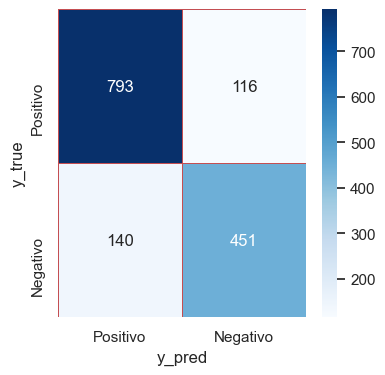

Modelo  Accuracy  f1_score   VP   VN   FP   FN
0        Random Forest Tokenizado  0.829333  0.746032  376  868   41  215
0  Regresi√≥n Log√≠stica Tokenizado  0.829333  0.778929  451  793  116  140

In [180]:
from sklearn.linear_model import LogisticRegression

#params = {'penalty': ['l1', '‚Äòl2', 'elasticnet', 'none'],'tol': [0.0001, 0.001, 0.01, 0.1]}
params = {'penalty': ['l1'],'tol': [0.01]}

lr_model = GridSearchCV(LogisticRegression(C=1, solver="liblinear"), params)
lr_model.fit(X_train, y_train)

print(lr_model.best_estimator_)
best_lr = lr_model.best_estimator_
y_pred = lr_model.best_estimator_.predict(X_test)

errores = errores.append(error('Regresi√≥n Log√≠stica Tokenizado', best_lr, X_train, y_train, X_test, y_test, y_pred))
errores

In [181]:
datos_pos, datos_neg = errores_reviews(y_test, y_pred, dev_token, 'words_rm')

Errores por cantidad de estrellas:
stars
1    13
2    21
3    82
4    92
5    48
Name: words, dtype: int64


Miramos para estos dos predictores, los reviews que fueron dif√≠ciles de predecir para ambos. Desde ya vemos que 3 y 4 estrellas fueron los peor predichos en sus grupos respectivos para ambos modelos, pero que la mayoria de errores est√° en la categoria de buenos reviews. Exploramos m√°s a continuaci√≥n:

In [182]:
print('Reviews positivos calificados como negativos:')
datos_pos.head()

Reviews positivos calificados como negativos:


review_title  \
3006                       bastante completo   
3007               cobran mucho por el envio   
3017                             su ligereza   
3036  muy bonito pero tiene solo una hebilla   
3043                               divertido   

                                            review_body  \
3006            no me gusta las instrucciones en ingles   
3007  llego bien pero el √∫ltimo d√≠a tardo casi una s...   
3017  que es muy ligero  aunque un poco bajo  y el p...   
3036  pone en la descripci√≥n que es de doble hebilla...   
3043  juego muy entretenido y educativo para toda fa...   

                                               words_rm  
3006                [completar, no, instrucci√≥n, ingle]  
3007  [cobrar, envio, bien, √∫ltimo, tardar, casi, se...  
3017  [ligereza, ligero, bajar, plegar, complicar, n...  
3036  [hebilla, descripci√≥n, doblar, hebilla, solame...  
3043  [divertir, jugar, entretener, educativo, todo,...

In [183]:
print('Reviews negativos calificados como positivos:')
datos_neg.head()

Reviews negativos calificados como positivos:


review_title  \
214  me gusta pero hay otras m√°s baratas de la mism...   
254                                         se levanta   
259                                      entrega tarde   
330                             complicado de imprimir   
393                           no es resistente al agua   

                                           review_body  \
214  cambio mi opini√≥n  es incomoda cuando llevas u...   
254  de las   unidades ya he gastado   porque se le...   
259  producto perfecto  entrega con seur  nefasta  ...   
330  es complicado de imprimir  recomiendo para los...   
393  he comprado este producto en el mes de febrero...   

                                              words_rm  
214  [barato, mismo, cambiar, opini√≥n, incomodar, r...  
254  [levantar, unidad, gastar, levantar, seguir, i...  
259  [entregar, tardar, perfecto, entregar, seur, n...  
330  [complicar, imprimir, complicar, imprimir, pri...  
393  [no, resistente, aguar, mes, febrero, mojarse,...

Observamos que estos reviews empiezan hablando de positivos antes de luego decir lo que no les gust√≥ del producto. Si la parte positiva del review tiene mayor extensi√≥n que la negativa, ser√° muy dificil que el modelo lo clasifique bien. 

### 4.1.3 Naive Bayes ComplementNB

El modelo multinomial Naive Bayes trabaja sobre datasets con varios labels, y  es uno de los tipos de modelo basado en Naive Bayes que se usan clasicamenTe en problemas de clasificaci√≥n de texto con vecTorizacioned del tipo Bag of Words. Una modificaci√≥n de este que ha probado tener mejores resultados consistentemente es el modelo Complement Naive Bayes, optimizado para datasets desbalanceados.

Como este √∫ltimo no es nuestro caso, no podemos elegir uno de estos dos modelos sin probarlos ambos, lo hacemos a continuaci√≥n: 

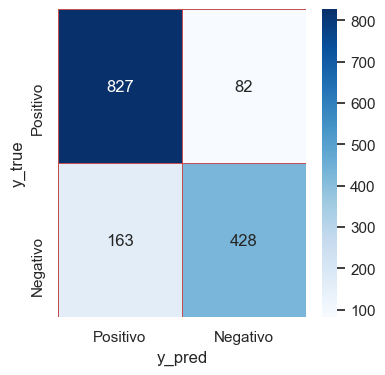

Modelo  Accuracy  f1_score   VP   VN   FP   FN
0             Random Forest Tokenizado  0.829333  0.746032  376  868   41  215
0       Regresi√≥n Log√≠stica Tokenizado  0.829333  0.778929  451  793  116  140
0  Naive Bayes ComplementNB Tokenizado  0.836667  0.777475  428  827   82  163

In [184]:
from sklearn.naive_bayes import ComplementNB

params = {'alpha': [0, 0,3, 0,6, 1],
		  'norm': [True, False]}
		  
cnb_model = GridSearchCV(ComplementNB(), params)
cnb_model.fit(X_train, y_train)
cnb_model = cnb_model.best_estimator_
y_pred = cnb_model.predict(X_test)

errores = errores.append(error('Naive Bayes ComplementNB Tokenizado', cnb_model, X_train, y_train, X_test, y_test, y_pred))
errores

## 4.2 Dataset tokenizado con palabras removidas

In [185]:
vectorizador=CountVectorizer(lowercase = False)

# Para los datos con palabras removidas
data_vec = vectorizador.fit_transform(data.words_joint_rm)
X_data_rm = data_vec.toarray()

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X_data_rm, data['binario'], test_size = 0.3, random_state=42)

### 4.2.1 Random Forest Classifier

RandomForestClassifier(max_depth=30, n_estimators=150, random_state=42)


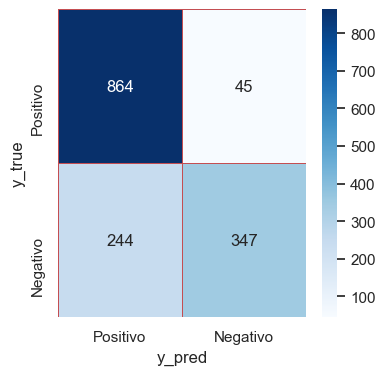

Modelo  Accuracy  f1_score   VP   VN   FP   FN
0             Random Forest Tokenizado  0.829333  0.746032  376  868   41  215
0       Regresi√≥n Log√≠stica Tokenizado  0.829333  0.778929  451  793  116  140
0  Naive Bayes ComplementNB Tokenizado  0.836667  0.777475  428  827   82  163
0              Random Forest Removidas  0.807333  0.706002  347  864   45  244

In [188]:
from sklearn.ensemble import RandomForestClassifier

#params = {'n_estimators': [50,,100,150], 'max_depth': [10,,15,30]}
params = {'n_estimators': [150],'max_depth': [30]}
rf = RandomForestClassifier(random_state=42)
rfo = GridSearchCV(rf, params)
rfo.fit(X_train,y_train)
print(rfo.best_estimator_)
best_rf = rfo.best_estimator_
y_pred = rfo.predict(X_test)

errores = errores.append(error('Random Forest Removidas', best_rf, X_train, y_train, X_test, y_test, y_pred))
errores

### 4.2.2 Regresi√≥n Log√≠stica

LogisticRegression(C=1, penalty='l1', solver='liblinear', tol=0.01)


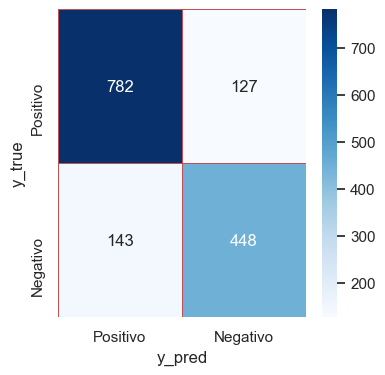

Modelo  Accuracy  f1_score   VP   VN   FP   FN
0             Random Forest Tokenizado  0.829333  0.746032  376  868   41  215
0       Regresi√≥n Log√≠stica Tokenizado  0.829333  0.778929  451  793  116  140
0  Naive Bayes ComplementNB Tokenizado  0.836667  0.777475  428  827   82  163
0              Random Forest Removidas  0.807333  0.706002  347  864   45  244
0        Regresi√≥n Log√≠stica Removidas  0.820000  0.768439  448  782  127  143

In [189]:
from sklearn.linear_model import LogisticRegression

#params = {'penalty': ['l1', '‚Äòl2', 'elasticnet', 'none'],'tol': [0.0001, 0.001, 0.01, 0.1]}
params = {'penalty': ['l1'],'tol': [0.01]}

lr_model = GridSearchCV(LogisticRegression(C=1, solver="liblinear"), params)
lr_model.fit(X_train, y_train)

print(lr_model.best_estimator_)
best_lr = lr_model.best_estimator_
y_pred = lr_model.best_estimator_.predict(X_test)

errores = errores.append(error('Regresi√≥n Log√≠stica Removidas', best_lr, X_train, y_train, X_test, y_test, y_pred))
errores

### 4.2.3 Naive Bayes Complement NB

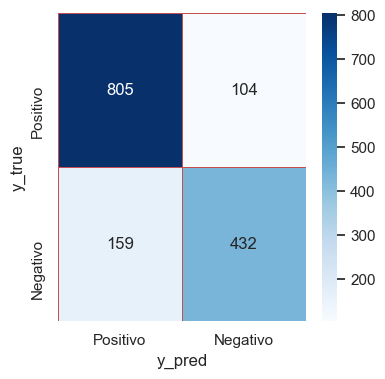

Modelo  Accuracy  f1_score   VP   VN   FP   FN
0             Random Forest Tokenizado  0.829333  0.746032  376  868   41  215
0       Regresi√≥n Log√≠stica Tokenizado  0.829333  0.778929  451  793  116  140
0  Naive Bayes ComplementNB Tokenizado  0.836667  0.777475  428  827   82  163
0              Random Forest Removidas  0.807333  0.706002  347  864   45  244
0        Regresi√≥n Log√≠stica Removidas  0.820000  0.768439  448  782  127  143
0   Naive Bayes ComplementNB Removidas  0.824667  0.766637  432  805  104  159

In [190]:
from sklearn.naive_bayes import ComplementNB

params = {'alpha': [0, 0,3, 0,6, 1],
		  'norm': [True, False]}
		  
cnb_model = GridSearchCV(ComplementNB(), params)
cnb_model.fit(X_train, y_train)
cnb_model = cnb_model.best_estimator_
y_pred = cnb_model.predict(X_test)

errores = errores.append(error('Naive Bayes ComplementNB Removidas', cnb_model, X_train, y_train, X_test, y_test, y_pred))
errores

## 4.3 Bigramas

Sabemos que el mejor modelo para tokens √∫nicos es un Logistic Regressor con Accuracy de alrededor del 81%, intentaremos mejorar sobre este benchmark usando estos mismos modelos con bigramas en vez de unigramas.

In [191]:
# Generamos el dataset con los bigramas
new_vec = CountVectorizer(analyzer='word', ngram_range=(2, 2))
new_data_vec = new_vec.fit_transform(data.words_joint)
X_data_bi = new_data_vec.toarray()

# Tomamos los bigramas unicos
all_bigrams = new_vec.get_feature_names()
print(len(all_bigrams))

52568


In [192]:
X_train, X_test, y_train, y_test = train_test_split(X_data_bi, data['binario'], test_size = 0.3, random_state=42)

### 4.3.1 Random Forest

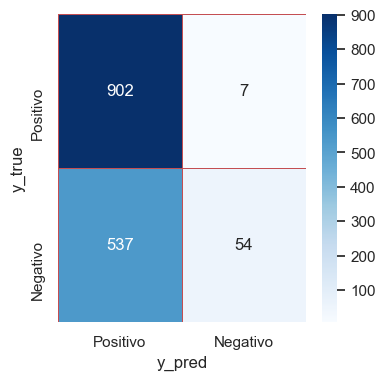

Modelo  Accuracy  f1_score   VP   VN   FP   FN
0             Random Forest Tokenizado  0.829333  0.746032  376  868   41  215
0       Regresi√≥n Log√≠stica Tokenizado  0.829333  0.778929  451  793  116  140
0  Naive Bayes ComplementNB Tokenizado  0.836667  0.777475  428  827   82  163
0              Random Forest Removidas  0.807333  0.706002  347  864   45  244
0        Regresi√≥n Log√≠stica Removidas  0.820000  0.768439  448  782  127  143
0   Naive Bayes ComplementNB Removidas  0.824667  0.766637  432  805  104  159
0                Random Forest Bigrama  0.637333  0.165644   54  902    7  537

In [193]:
# Utilizamos el mejor estimador Random Forest, con esta nueva data
best_rf.fit(X_train,y_train)
y_pred = best_rf.predict(X_test)
errores = errores.append(error('Random Forest Bigrama', best_rf, X_train, y_train, X_test, y_test, y_pred))
errores

### 4.3.2. Regresi√≥n Log√≠stica

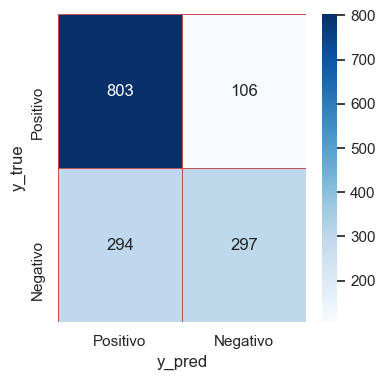

Modelo  Accuracy  f1_score   VP   VN   FP   FN
0             Random Forest Tokenizado  0.829333  0.746032  376  868   41  215
0       Regresi√≥n Log√≠stica Tokenizado  0.829333  0.778929  451  793  116  140
0  Naive Bayes ComplementNB Tokenizado  0.836667  0.777475  428  827   82  163
0              Random Forest Removidas  0.807333  0.706002  347  864   45  244
0        Regresi√≥n Log√≠stica Removidas  0.820000  0.768439  448  782  127  143
0   Naive Bayes ComplementNB Removidas  0.824667  0.766637  432  805  104  159
0                Random Forest Bigrama  0.637333  0.165644   54  902    7  537
0          Regresi√≥n Log√≠stica Bigrama  0.733333  0.597586  297  803  106  294

In [194]:
best_lr.fit(X_train,y_train)
y_pred = best_lr.predict(X_test)
errores = errores.append(error('Regresi√≥n Log√≠stica Bigrama', best_lr, X_train, y_train, X_test, y_test, y_pred))
errores

### 4.3.3 Naive Bayes Complement NB

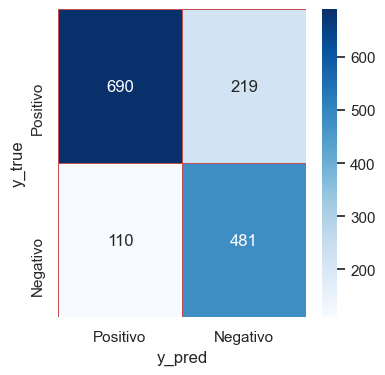

Modelo  Accuracy  f1_score   VP   VN   FP   FN
0             Random Forest Tokenizado  0.829333  0.746032  376  868   41  215
0       Regresi√≥n Log√≠stica Tokenizado  0.829333  0.778929  451  793  116  140
0  Naive Bayes ComplementNB Tokenizado  0.836667  0.777475  428  827   82  163
0              Random Forest Removidas  0.807333  0.706002  347  864   45  244
0        Regresi√≥n Log√≠stica Removidas  0.820000  0.768439  448  782  127  143
0   Naive Bayes ComplementNB Removidas  0.824667  0.766637  432  805  104  159
0                Random Forest Bigrama  0.637333  0.165644   54  902    7  537
0          Regresi√≥n Log√≠stica Bigrama  0.733333  0.597586  297  803  106  294
0     Naive Bayes ComplementNB Binario  0.780667  0.745159  481  690  219  110

In [195]:
from sklearn.naive_bayes import ComplementNB

params = {'alpha': [0, 0,3, 0,6, 1],
		  'norm': [True, False]}
		  
cnb_model = GridSearchCV(ComplementNB(), params)
cnb_model.fit(X_train, y_train)
cnb_model = cnb_model.best_estimator_
y_pred = cnb_model.predict(X_test)

errores = errores.append(error('Naive Bayes ComplementNB Binario', cnb_model, X_train, y_train, X_test, y_test, y_pred))
errores

In [211]:
print(cnb_model)

ComplementNB(alpha=1)


## 4.4 Dataset con bigrama afirmativo y negativo

In [196]:
data['words_no'] = data['words_joint'].apply(lambda x: re.sub('^no\s',' no',x))
data['words_no'] = data['words_no'].apply(lambda x: re.sub('\sno\s',' no',x))
data['words_no'] = data['words_no'].apply(lambda x: re.sub('^si\s',' si',x))
data['words_no'] = data['words_no'].apply(lambda x: re.sub('\ssi\s',' si',x))

In [197]:
vectorizador=CountVectorizer(lowercase = False)
# Para los datos sin remover palabras
data_vec_no = vectorizador.fit_transform(data.words_no)
X_data_no = data_vec_no.toarray()

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X_data_no, data['binario'], test_size = 0.3, random_state=42)

### 4.4.1 Random Forest

RandomForestClassifier(max_depth=30, n_estimators=150, random_state=42)


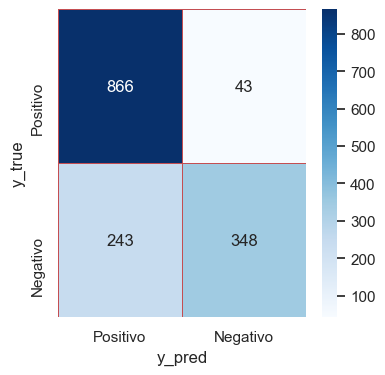

Modelo  Accuracy  f1_score   VP   VN   FP   FN
0             Random Forest Tokenizado  0.829333  0.746032  376  868   41  215
0       Regresi√≥n Log√≠stica Tokenizado  0.829333  0.778929  451  793  116  140
0  Naive Bayes ComplementNB Tokenizado  0.836667  0.777475  428  827   82  163
0              Random Forest Removidas  0.807333  0.706002  347  864   45  244
0        Regresi√≥n Log√≠stica Removidas  0.820000  0.768439  448  782  127  143
0   Naive Bayes ComplementNB Removidas  0.824667  0.766637  432  805  104  159
0                Random Forest Bigrama  0.637333  0.165644   54  902    7  537
0          Regresi√≥n Log√≠stica Bigrama  0.733333  0.597586  297  803  106  294
0     Naive Bayes ComplementNB Binario  0.780667  0.745159  481  690  219  110
0          Random Forest Bigrama Si/No  0.809333  0.708758  348  866   43  243

In [199]:
#params = {'n_estimators': [50,,100,150], 'max_depth': [10,,15,30]}
params = {'n_estimators': [150],'max_depth': [30]}
rf = RandomForestClassifier(random_state=42)
rfo = GridSearchCV(rf, params)
rfo.fit(X_train,y_train)
print(rfo.best_estimator_)
best_rf = rfo.best_estimator_
y_pred = rfo.predict(X_test)
errores = errores.append(error('Random Forest Bigrama Si/No', best_rf, X_train, y_train, X_test, y_test, y_pred))
errores

### 4.4.2 Regresi√≥n Log√≠stica

LogisticRegression(C=1, penalty='l1', solver='liblinear', tol=0.01)


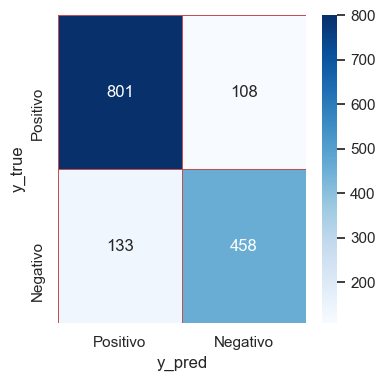

Modelo  Accuracy  f1_score   VP   VN   FP   FN
0             Random Forest Tokenizado  0.829333  0.746032  376  868   41  215
0       Regresi√≥n Log√≠stica Tokenizado  0.829333  0.778929  451  793  116  140
0  Naive Bayes ComplementNB Tokenizado  0.836667  0.777475  428  827   82  163
0              Random Forest Removidas  0.807333  0.706002  347  864   45  244
0        Regresi√≥n Log√≠stica Removidas  0.820000  0.768439  448  782  127  143
0   Naive Bayes ComplementNB Removidas  0.824667  0.766637  432  805  104  159
0                Random Forest Bigrama  0.637333  0.165644   54  902    7  537
0          Regresi√≥n Log√≠stica Bigrama  0.733333  0.597586  297  803  106  294
0     Naive Bayes ComplementNB Binario  0.780667  0.745159  481  690  219  110
0          Random Forest Bigrama Si/No  0.809333  0.708758  348  866   43  243
0    Regresi√≥n Log√≠stica Bigrama Si/No  0.839333  0.791703  458  801  108  133

In [200]:
#params = {'penalty': ['l1', '‚Äòl2', 'elasticnet', 'none'],'tol': [0.0001, 0.001, 0.01, 0.1]}
params = {'penalty': ['l1'],'tol': [0.01]}
lr_model = GridSearchCV(LogisticRegression(C=1, solver="liblinear"), params)
lr_model.fit(X_train, y_train)
print(lr_model.best_estimator_)
best_lr = lr_model.best_estimator_
y_pred = lr_model.best_estimator_.predict(X_test)
errores = errores.append(error('Regresi√≥n Log√≠stica Bigrama Si/No', best_lr, X_train, y_train, X_test, y_test, y_pred))
errores

### 4.3.3 Naive Bayes Complement NB

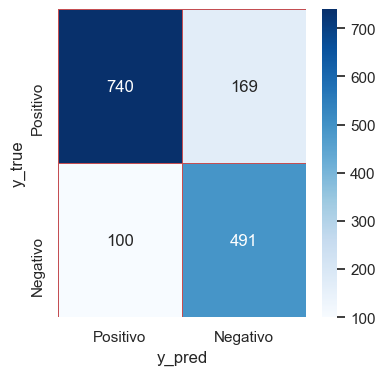

Modelo  Accuracy  f1_score   VP   VN   FP  \
0                Random Forest Tokenizado  0.829333  0.746032  376  868   41   
0          Regresi√≥n Log√≠stica Tokenizado  0.829333  0.778929  451  793  116   
0     Naive Bayes ComplementNB Tokenizado  0.836667  0.777475  428  827   82   
0                 Random Forest Removidas  0.807333  0.706002  347  864   45   
0           Regresi√≥n Log√≠stica Removidas  0.820000  0.768439  448  782  127   
0      Naive Bayes ComplementNB Removidas  0.824667  0.766637  432  805  104   
0                   Random Forest Bigrama  0.637333  0.165644   54  902    7   
0             Regresi√≥n Log√≠stica Bigrama  0.733333  0.597586  297  803  106   
0        Naive Bayes ComplementNB Binario  0.780667  0.745159  481  690  219   
0             Random Forest Bigrama Si/No  0.809333  0.708758  348  866   43   
0       Regresi√≥n Log√≠stica Bigrama Si/No  0.839333  0.791703  458  801  108   
0  Naive Bayes ComplementNB Bigrama Si/No  0.820667  0.784972  491  740  169   

    FN  
0  215  
0  140  
0  163  
0  244  
0  143  
0  159  
0  537  
0  294  
0  110  
0  243  
0  133  
0  100

In [201]:
from sklearn.naive_bayes import ComplementNB

params = {'alpha': [0, 0,3, 0,6, 1],
		  'norm': [True, False]}
		  
cnb_model = GridSearchCV(ComplementNB(), params)
cnb_model.fit(X_train, y_train)
cnb_model = cnb_model.best_estimator_
y_pred = cnb_model.predict(X_test)

errores = errores.append(error('Naive Bayes ComplementNB Bigrama Si/No', cnb_model, X_train, y_train, X_test, y_test, y_pred))
errores

## 5. Modelos de clasificaci√≥n de 5 estrellas

A partir de los resultados obtenidos en la clasificaci√≥n binaria y las correcciones aplicadas al preprocesamiento de datos, procedemos a iniciar con los modelos de clasificaci√≥n para las 5 estrellas.

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X_data_no, data['stars'], test_size = 0.3, random_state=42)

### 5.1 Naive Bayes Complement 

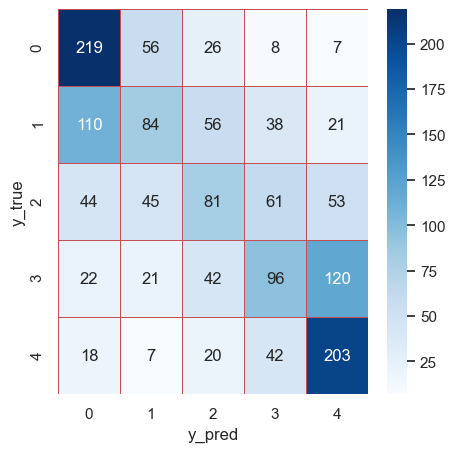

Errores por cantidad de estrellas:
stars
1     97
2    225
3    203
4    205
5     87
Name: words, dtype: int64


Modelo  Accuracy  \
0  Naive Bayes ComplementNB Estrellas  0.455333   

                                            f1_score  
0  [0.6008230452674896, 0.3218390804597701, 0.318...

In [203]:
cnb_model.fit(X_train, y_train)
y_pred = cnb_model.predict(X_test)

errores5 = error5('Naive Bayes ComplementNB Estrellas', cnb_model, X_train, y_train, X_test, y_test, y_pred, dev_token)
errores5

Naive Bayes, aunque tiene buen desempe√±o para una predici√≥n macro binaria, no parece tenerlo para nuestra meta final que es predecir los 5 niveles de satsfacci√≥n del cliente. Pasaremos a otros modelos.

### 5.2 Random Forest

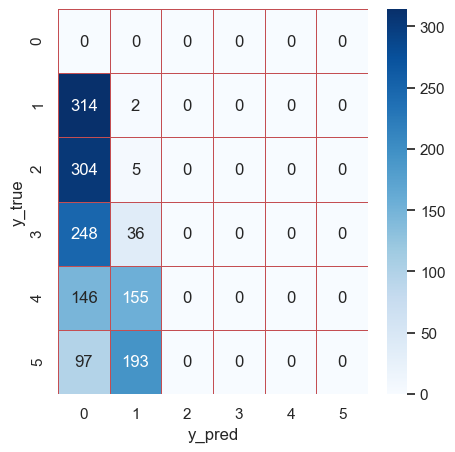

Errores por cantidad de estrellas:
stars
1    314
2    309
3    284
4    301
5    290
Name: words, dtype: int64


Modelo  Accuracy  \
0  Naive Bayes ComplementNB Estrellas  0.455333   
0             Random Forest Estrellas  0.476667   

                                            f1_score  
0  [0.6008230452674896, 0.3218390804597701, 0.318...  
0    [0.0, 0.005657708628005658, 0.0, 0.0, 0.0, 0.0]

In [204]:
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators': [10, 25, 50, 100],
		  'max_depth': [2, 4, 10, 15]}
rf = GridSearchCV(RandomForestClassifier(), params)
rf.fit(X_train, y_train)
rf = rf.best_estimator_
y_pred = rfo.predict(X_test)

errores5 = errores5.append(error5('Random Forest Estrellas', rf, X_train, y_train, X_test, y_test, y_pred, dev_token))
errores5

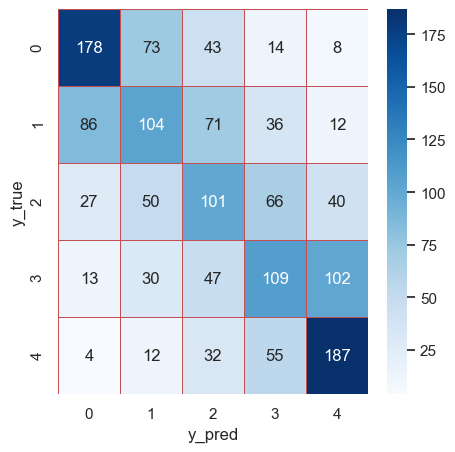

Errores por cantidad de estrellas:
stars
1    138
2    205
3    183
4    192
5    103
Name: words, dtype: int64


Modelo  Accuracy  \
0  Naive Bayes ComplementNB Estrellas  0.455333   
0             Random Forest Estrellas  0.476667   
0                     Ridge Estrellas  0.452667   

                                            f1_score  
0  [0.6008230452674896, 0.3218390804597701, 0.318...  
0    [0.0, 0.005657708628005658, 0.0, 0.0, 0.0, 0.0]  
0  [0.5705128205128205, 0.3598615916955018, 0.349...

In [205]:
from sklearn.linear_model import RidgeClassifier

#Generaci√≥n del modelo lineal

ridge = RidgeClassifier(solver='sag', tol=0.01)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

errores5 = errores5.append(error5('Ridge Estrellas', ridge, X_train, y_train, X_test, y_test, y_pred, dev_token))
errores5

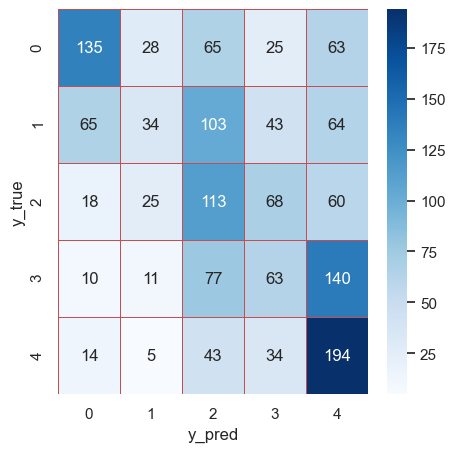

Errores por cantidad de estrellas:
stars
1    181
2    275
3    171
4    238
5     96
Name: words, dtype: int64


Modelo  Accuracy  \
0  Naive Bayes ComplementNB Estrellas  0.455333   
0             Random Forest Estrellas  0.476667   
0                     Ridge Estrellas  0.452667   
0                       KNN Estrellas  0.359333   

                                            f1_score  
0  [0.6008230452674896, 0.3218390804597701, 0.318...  
0    [0.0, 0.005657708628005658, 0.0, 0.0, 0.0, 0.0]  
0  [0.5705128205128205, 0.3598615916955018, 0.349...  
0  [0.48387096774193544, 0.1650485436893204, 0.32...

In [206]:
from sklearn.neighbors import KNeighborsClassifier

params = {'n_neighbors' : [5, 10, 15, 20, 30]}
neigh = GridSearchCV(KNeighborsClassifier(), params)
neigh.fit(X_train, y_train)
neigh = neigh.best_estimator_
y_pred = neigh.predict(X_test)

errores5 = errores5.append(error5('KNN Estrellas', neigh, X_train, y_train, X_test, y_test, y_pred, dev_token))
errores5

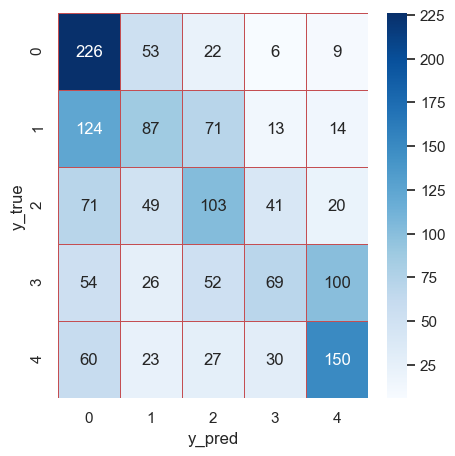

Errores por cantidad de estrellas:
stars
1     90
2    222
3    181
4    232
5    140
Name: words, dtype: int64


Modelo  Accuracy  \
0  Naive Bayes ComplementNB Estrellas  0.455333   
0             Random Forest Estrellas  0.476667   
0                     Ridge Estrellas  0.452667   
0                       KNN Estrellas  0.359333   
0          Nearest Centroid Estrellas  0.423333   

                                            f1_score  
0  [0.6008230452674896, 0.3218390804597701, 0.318...  
0    [0.0, 0.005657708628005658, 0.0, 0.0, 0.0, 0.0]  
0  [0.5705128205128205, 0.3598615916955018, 0.349...  
0  [0.48387096774193544, 0.1650485436893204, 0.32...  
0  [0.5311398354876616, 0.3180987202925046, 0.368...

In [207]:
from sklearn.neighbors import NearestCentroid

centroid = NearestCentroid()
centroid.fit(X_train, y_train)
y_pred = centroid.predict(X_test)

errores5 = errores5.append(error5('Nearest Centroid Estrellas', centroid, X_train, y_train, X_test, y_test, y_pred, dev_token))
errores5

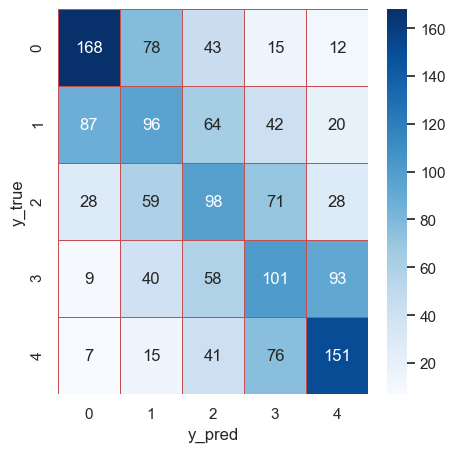

Errores por cantidad de estrellas:
stars
1    148
2    213
3    186
4    200
5    139
Name: words, dtype: int64


Modelo  Accuracy  \
0      Naive Bayes ComplementNB Estrellas  0.455333   
0                 Random Forest Estrellas  0.476667   
0                         Ridge Estrellas  0.452667   
0                           KNN Estrellas  0.359333   
0              Nearest Centroid Estrellas  0.423333   
0  Passive Agressive Classifier Estrellas  0.409333   

                                            f1_score  
0  [0.6008230452674896, 0.3218390804597701, 0.318...  
0    [0.0, 0.005657708628005658, 0.0, 0.0, 0.0, 0.0]  
0  [0.5705128205128205, 0.3598615916955018, 0.349...  
0  [0.48387096774193544, 0.1650485436893204, 0.32...  
0  [0.5311398354876616, 0.3180987202925046, 0.368...  
0  [0.5463414634146342, 0.321608040201005, 0.3333...

In [208]:
from sklearn.linear_model import PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier()
pac.fit(X_train, y_train)
y_pred = pac.predict(X_test)

errores5 = errores5.append(error5('Passive Agressive Classifier Estrellas', pac, X_train, y_train, X_test, y_test, y_pred, dev_token))
errores5

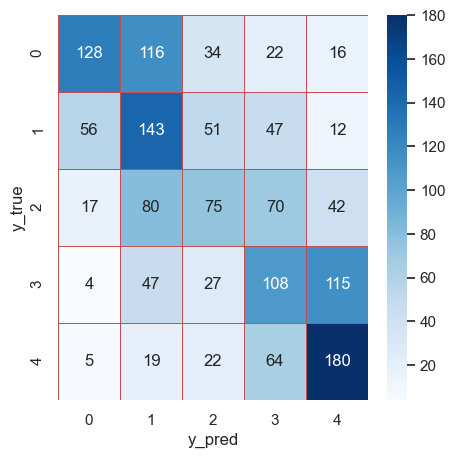

Errores por cantidad de estrellas:
stars
1    188
2    166
3    209
4    193
5    110
Name: words, dtype: int64


Modelo  Accuracy  \
0      Naive Bayes ComplementNB Estrellas  0.455333   
0                 Random Forest Estrellas  0.476667   
0                         Ridge Estrellas  0.452667   
0                           KNN Estrellas  0.359333   
0              Nearest Centroid Estrellas  0.423333   
0  Passive Agressive Classifier Estrellas  0.409333   
0                    Perceptron Estrellas  0.422667   

                                            f1_score  
0  [0.6008230452674896, 0.3218390804597701, 0.318...  
0    [0.0, 0.005657708628005658, 0.0, 0.0, 0.0, 0.0]  
0  [0.5705128205128205, 0.3598615916955018, 0.349...  
0  [0.48387096774193544, 0.1650485436893204, 0.32...  
0  [0.5311398354876616, 0.3180987202925046, 0.368...  
0  [0.5463414634146342, 0.321608040201005, 0.3333...  
0  [0.4866920152091255, 0.4005602240896358, 0.304...

In [209]:
from sklearn.linear_model import Perceptron #se demoro 1563 segundos

params = {'penalty' : ['l2','l1','elasticnet'],
		  'alpha' : [0.0001, 0.001, 0.01, 0.1]}
perceptron = GridSearchCV(Perceptron(), params)
perceptron.fit(X_train, y_train)
perceptron = perceptron.best_estimator_
y_pred = perceptron.predict(X_test)

errores5 = errores5.append(error5('Perceptron Estrellas', perceptron, X_train, y_train, X_test, y_test, y_pred, dev_token))
errores5

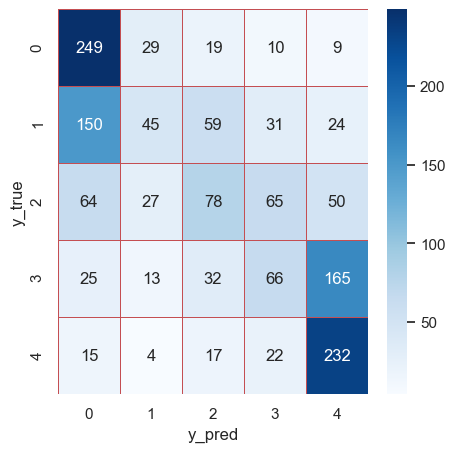

Errores por cantidad de estrellas:
stars
1     67
2    264
3    206
4    235
5     58
Name: words, dtype: int64


Modelo  Accuracy  \
0      Naive Bayes ComplementNB Estrellas  0.455333   
0                 Random Forest Estrellas  0.476667   
0                         Ridge Estrellas  0.452667   
0                           KNN Estrellas  0.359333   
0              Nearest Centroid Estrellas  0.423333   
0  Passive Agressive Classifier Estrellas  0.409333   
0                    Perceptron Estrellas  0.422667   
0                 SGDClassifier Estrellas  0.446667   

                                            f1_score  
0  [0.6008230452674896, 0.3218390804597701, 0.318...  
0    [0.0, 0.005657708628005658, 0.0, 0.0, 0.0, 0.0]  
0  [0.5705128205128205, 0.3598615916955018, 0.349...  
0  [0.48387096774193544, 0.1650485436893204, 0.32...  
0  [0.5311398354876616, 0.3180987202925046, 0.368...  
0  [0.5463414634146342, 0.321608040201005, 0.3333...  
0  [0.4866920152091255, 0.4005602240896358, 0.304...  
0  [0.608058608058608, 0.21077283372365338, 0.319...

In [210]:
from sklearn.linear_model import SGDClassifier #Se demor√≥ 2.1k segundos .

params = {'penalty' : ['l2','l1','elasticnet'],
		  'alpha' : [0.0001, 0.001, 0.01, 0.1]}
sgd = GridSearchCV(SGDClassifier(), params)
sgd.fit(X_train, y_train)
sgd = sgd.best_estimator_
y_pred = sgd.predict(X_test)

errores5 = errores5.append(error5('SGDClassifier Estrellas', sgd, X_train, y_train, X_test, y_test, y_pred, dev_token))
errores5

## 6. Modelo Final

### 6.1. Preprocesamiento

In [218]:
def limpieza(dev):

    characters_list = set.review_body.apply(lambda x: [each for each in x if not each.isalpha() and each != ' '])
    df_caracteres = []
    for i in range(len(characters_list)):
	    df_caracteres.append(characters_list[i])
    df_caracteres = [item for elem in df_caracteres for item in elem]

    for character in df_caracteres:
        dev.review_body = dev.review_body.apply(lambda x: x.replace(character, ' '))
        dev.review_title = dev.review_title.apply(lambda x: x.replace(character, ' '))

    return dev.review_body, dev.review_title

In [220]:
train.review_body, train.review_                                                                                title = limpieza(train)
train_token = tokenizar(train)
train_token.head()

KeyboardInterrupt: 

In [ ]:
def lematizar(dev_token):
    dev_token['body_lemma'] = dev_token.body_token.apply(lambda x: ' '.join(x))
    dev_token['body_lemma'] = dev_token.body_lemma.apply(lambda y: [token.lemma_ for token in nlp(y)])
    dev_token['title_lemma'] = dev_token.title_token.apply(lambda x: ' '.join(x))
    dev_token['title_lemma'] = dev_token.title_lemma.apply(lambda y: [token.lemma_ for token in nlp(y)])

In [ ]:
get_freqs(train_token,'title_lemma','T√≠tulos de los review')
get_freqs(train_token,'body_lemma','Body de los review')